<a href="https://colab.research.google.com/github/Rkankam24/FreeCodeCampCerti/blob/main/PageViewTimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!wget https://raw.githubusercontent.com/fuzzyray/page-view-time-series-visualizer/refs/heads/main/fcc-forum-pageviews.csv

--2025-09-28 13:29:13--  https://raw.githubusercontent.com/fuzzyray/page-view-time-series-visualizer/refs/heads/main/fcc-forum-pageviews.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22381 (22K) [text/plain]
Saving to: ‘fcc-forum-pageviews.csv.2’

fcc-forum-pageviews 100%[===================>]  21.86K  --.-KB/s    in 0.002s  

2025-09-28 13:29:13 (8.76 MB/s) - ‘fcc-forum-pageviews.csv.2’ saved [22381/22381]



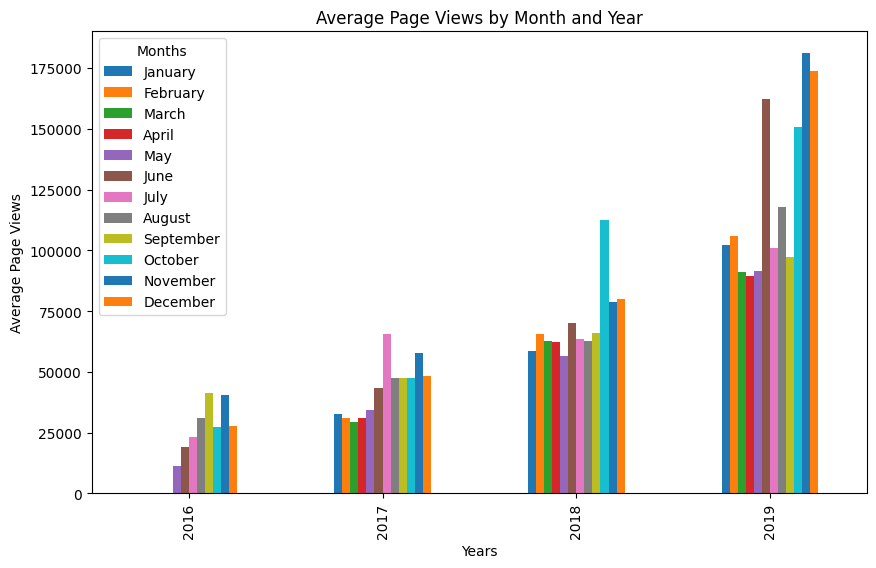

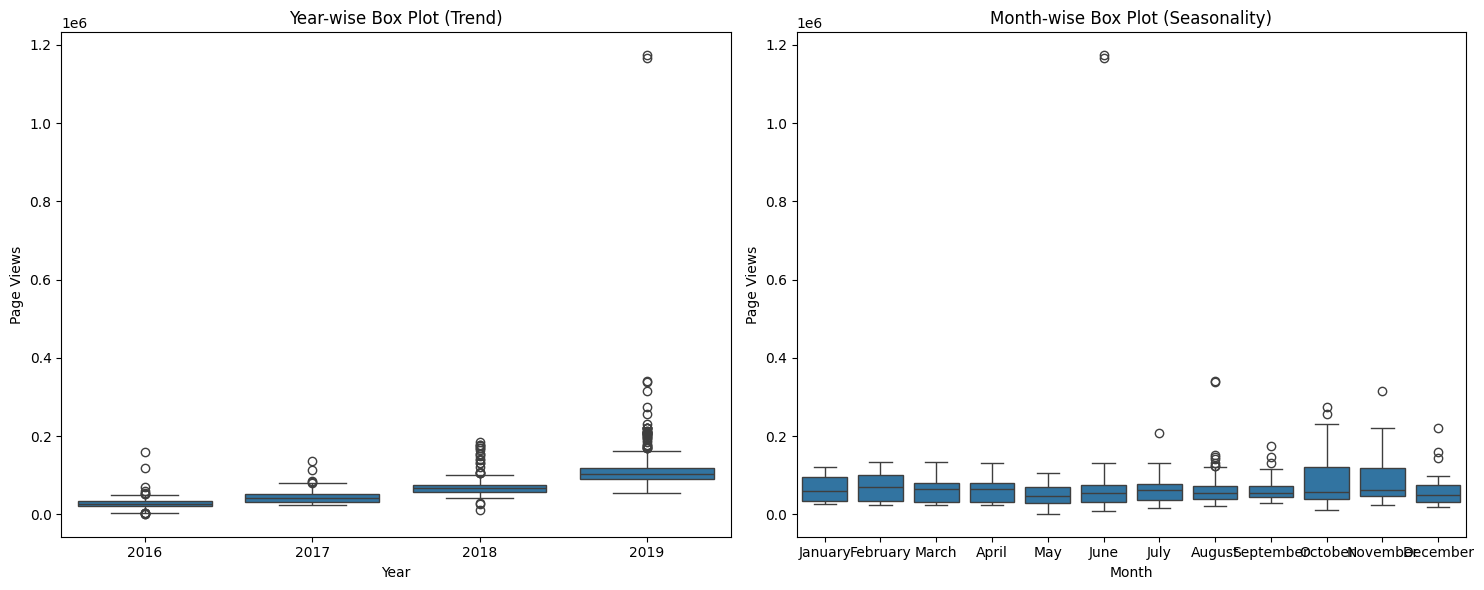

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime

def draw_line_plot():
    # Read data and set the date column as index
    df = pd.read_csv('fcc-forum-pageviews.csv')
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    # Create line plot
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df.index, df['value'], 'b-', linewidth=1)
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')

    # Save and return figure
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Read data and set the date column as index
    df = pd.read_csv('fcc-forum-pageviews.csv')
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    # Create a new DataFrame with year and month
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.strftime('%B')

    # Group by year and month, calculate mean
    df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()

    # Order months
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    df_bar = df_bar[month_order]

    # Create bar plot
    fig, ax = plt.subplots(figsize=(10, 6))
    df_bar.plot(kind='bar', ax=ax)
    ax.set_title('Average Page Views by Month and Year')
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')
    ax.legend(title='Months')

    # Save and return figure
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Read data and set the date column as index
    df = pd.read_csv('fcc-forum-pageviews.csv')
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    # Prepare data for box plots
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = df_box['date'].dt.year
    df_box['month'] = df_box['date'].dt.month_name()

    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Year-wise Box Plot (Trend)
    sns.boxplot(x='year', y='value', data=df_box, ax=ax1)
    ax1.set_title('Year-wise Box Plot (Trend)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Page Views')

    # Month-wise Box Plot (Seasonality)
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    sns.boxplot(x='month', y='value', data=df_box, order=month_order, ax=ax2)
    ax2.set_title('Month-wise Box Plot (Seasonality)')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Page Views')

    # Adjust layout
    plt.tight_layout()

    # Save and return figure
    fig.savefig('box_plot.png')
    return fig

def draw_plots():
    # Call all functions and store the figures
    fig_line = draw_line_plot()
    fig_bar = draw_bar_plot()
    fig_box = draw_box_plot()
    return fig_line, fig_bar, fig_box

# Run the function to test (optional)
if __name__ == '__main__':
    figs = draw_plots()
    for fig in figs:
        plt.close(fig)
        plt.show()